## Importation des librairies

In [1]:
import pandas as pd
import statsmodels

## Données de l'insee chiffres d'affaires des entreprises

In [2]:
data = pd.read_csv("valeurs_mensuelles.csv", sep=";",skiprows= 2, index_col = 0, parse_dates = True)

In [3]:
data.shape

(251, 2)

## Data cleaning

In [4]:
data.head()

,Unnamed: 1,Unnamed: 2
Période,,
2019-11-01,115.90,A
2019-10-01,123.81,A
2019-09-01,114.43,A
2019-08-01,114.47,A
2019-07-01,109.02,A


In [5]:
data.tail()

,Unnamed: 1,Unnamed: 2
Période,,
1999-05-01,60.21,A
1999-04-01,63.06,A
1999-03-01,66.56,A
1999-02-01,57.36,A
1999-01-01,57.57,A


In [6]:
data = data.drop("Unnamed: 2", axis = 1)


In [7]:
data = data.rename(columns= {'Unnamed: 1':'valeur'})
data.head()

,valeur
Période,
2019-11-01,115.90
2019-10-01,123.81
2019-09-01,114.43
2019-08-01,114.47
2019-07-01,109.02


## Méthode 1 : tester la stationarité de la série avec statsmodels

In [8]:
#rendre la serie stationnaire en enlèvant la tendance
from statsmodels.tsa.tsatools import detrend
notrend = detrend(data['valeur'])
data["notrend"]= notrend

In [9]:
data.head()

,valeur,notrend
Période,,
2019-11-01,115.90,2.059811
2019-10-01,123.81,10.154529
2019-09-01,114.43,0.959246
2019-08-01,114.47,1.183963
2019-07-01,109.02,-4.081319


In [10]:
#visualisation de la série
import matplotlib.pyplot as plt
data.plot(y= ["valeur", "notrend"], figsize = (14,4))

In [11]:
#utiliser seasonal_decompose pour analyser la serie temporelle et decomposer la tendance la saisonalité et le résidu
from statsmodels.tsa.seasonal import seasonal_decompose
data_decompose = seasonal_decompose(data['valeur'])
print(data_decompose.trend)
print(data_decompose.seasonal)
print(data_decompose.resid)
print(data_decompose.observed)

Période
2019-11-01           NaN
2019-10-01           NaN
2019-09-01           NaN
2019-08-01           NaN
2019-07-01           NaN
2019-06-01           NaN
2019-05-01    114.611667
2019-04-01    114.515000
2019-03-01    114.186250
2019-02-01    113.873333
2019-01-01    113.536250
2018-12-01    113.334583
2018-11-01    113.166250
2018-10-01    112.629167
2018-09-01    112.257500
2018-08-01    112.021250
2018-07-01    111.669583
2018-06-01    111.497500
2018-05-01    111.325000
2018-04-01    110.735000
2018-03-01    110.281250
2018-02-01    109.990833
2018-01-01    109.438750
2017-12-01    108.885417
2017-11-01    108.452917
2017-10-01    108.004583
2017-09-01    107.621667
2017-08-01    107.346667
2017-07-01    106.957083
2017-06-01    106.575833
                 ...    
2001-06-01     73.098750
2001-05-01     72.936667
2001-04-01     72.652917
2001-03-01     72.387500
2001-02-01     72.126667
2001-01-01     71.711250
2000-12-01     71.242500
2000-11-01     70.878750
2000-10-01     70

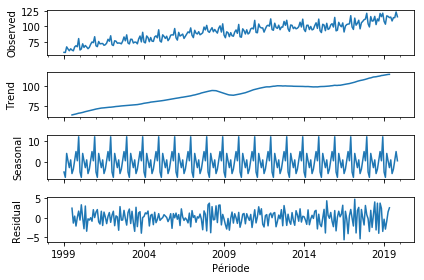

In [12]:
data_decompose.plot()
plt.show()

In [13]:
data['trend']= data_decompose.trend
data['seasonal'] = data_decompose.seasonal
data['resid'] = data_decompose.resid

data.head(10)

,valeur,notrend,trend,seasonal,resid
Période,,,,,
2019-11-01,115.90,2.059811,NaN,0.555686,NaN
2019-10-01,123.81,10.154529,NaN,4.925019,NaN
2019-09-01,114.43,0.959246,NaN,0.758228,NaN
2019-08-01,114.47,1.183963,NaN,-3.405835,NaN
2019-07-01,109.02,-4.081319,NaN,-5.494897,NaN
2019-06-01,115.40,2.483398,NaN,0.980536,NaN
2019-05-01,114.46,1.728115,114.611667,-2.690272,2.538606
2019-04-01,116.49,3.942833,114.515000,0.472436,1.502564
2019-03-01,117.39,5.027550,114.186250,4.038665,-0.834915


In [14]:
#test de dickeyfuller
from statsmodels.tsa.stattools import adfuller
X = data.notrend
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.466618
p-value: 0.008887
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573


## Méthode 2 faire les transformations à la main pour obtenir une série stationnaire

In [15]:
# récup les données
data2 =  pd.read_csv("valeurs_mensuelles.csv", sep=";",skiprows= 2, index_col = 0, parse_dates = True)
data2 = data2.drop("Unnamed: 2", axis = 1)
data2 = data2.rename(columns= {'Unnamed: 1':'valeur'})
data2.head()


,valeur
Période,
2019-11-01,115.90
2019-10-01,123.81
2019-09-01,114.43
2019-08-01,114.47
2019-07-01,109.02


In [16]:
#difference première à la main
data2['diff première']=data2.diff(axis = 0, periods = 1) 
#difference second

data2.head()

,valeur,diff première
Période,,
2019-11-01,115.90,NaN
2019-10-01,123.81,7.91
2019-09-01,114.43,-9.38
2019-08-01,114.47,0.04
2019-07-01,109.02,-5.45


In [32]:
data2['diff second'] = data2['diff première'].diff(1)
data2.dropna(inplace = True)
data2.head()

,valeur,diff première,diff second
Période,,,
2019-09-01,114.43,-9.38,-17.29
2019-08-01,114.47,0.04,9.42
2019-07-01,109.02,-5.45,-5.49
2019-06-01,115.40,6.38,11.83
2019-05-01,114.46,-0.94,-7.32


In [40]:
data2['diff 12'] = data2['valeur'].diff(12)
data2.dropna(inplace = True)
data2.head()

,valeur,diff première,diff second,diff 12
Période,,,,
2018-09-01,109.06,-12.23,-17.42,-5.37
2018-08-01,112.33,3.27,15.50,-2.14
2018-07-01,103.07,-9.26,-12.53,-5.95
2018-06-01,116.51,13.44,22.70,1.11
2018-05-01,109.31,-7.20,-20.64,-5.15


In [122]:
(data2.iloc[0])

valeur                 106.84
diff première            5.00
diff second              2.71
diff 12                 -6.87
diff 12 et 1            -6.65
diff premiere et 12     -6.65
diff12_1                -6.65
date                     0.00
Name: 2016-03-01 00:00:00, dtype: float64

In [114]:
import numpy as np
data2['diff12_1'] = data2['diff 12'].diff(1)
data2.dropna(inplace = True)
data2['date']= np.arange(len(data2.index))
data2.head()


,valeur,diff première,diff second,diff 12,diff 12 et 1,diff premiere et 12,diff12_1,date
Période,,,,,,,,
2016-03-01,106.84,5.00,2.71,-6.87,-6.65,-6.65,-6.65,0
2016-02-01,93.81,-13.03,-18.03,-1.30,5.57,5.57,5.57,1
2016-01-01,92.84,-0.97,12.06,-6.36,-5.06,-5.06,-5.06,2
2015-12-01,114.85,22.01,22.98,-2.84,3.52,3.52,3.52,3
2015-11-01,99.09,-15.76,-37.77,-5.20,-2.36,-2.36,-2.36,4


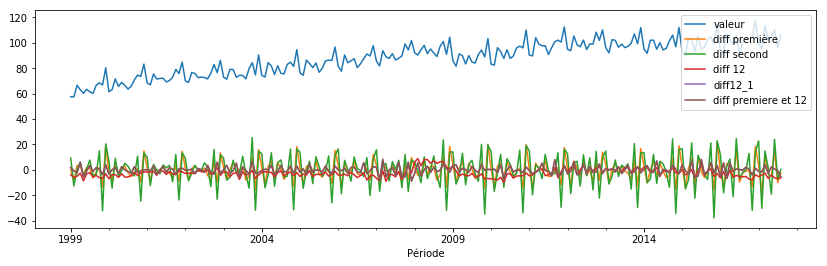

In [74]:
data2.plot(y=['valeur', 'diff première', 'diff second', 'diff 12', 'diff12_1', 'diff premiere et 12'],figsize=(14,4))

In [18]:
#test de dickeyfuller
from statsmodels.tsa.stattools import adfuller
data2 = data2.dropna()
data2.head()
X = data2['diff première']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.501702
p-value: 0.115061
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573


In [34]:
#test dickey fuller diff second
from statsmodels.tsa.stattools import adfuller
data2 = data2.dropna()
data2.head()
Z = data2['diff second']
result = adfuller(Z)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.446632
p-value: 0.000003
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.573


In [42]:
#tesdickey fuller diff 12
from statsmodels.tsa.stattools import adfuller
data2 = data2.dropna()
data2.head()
T = data2['diff 12']
result = adfuller(T)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.916315
p-value: 0.001918
Critical Values:
	1%: -3.460
	5%: -2.875
	10%: -2.574


In [75]:
#tesdickey fuller diff 12 et 1
from statsmodels.tsa.stattools import adfuller
data2 = data2.dropna()
data2.head()
R = data2['diff12_1']
result = adfuller(R)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.216375
p-value: 0.000008
Critical Values:
	1%: -3.462
	5%: -2.876
	10%: -2.574


## Tracer les autocorelations et les autocorelations partielles

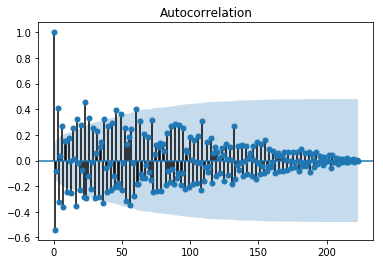

In [76]:
#trace les autocorelations
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
plot_acf(R)
pyplot.show()


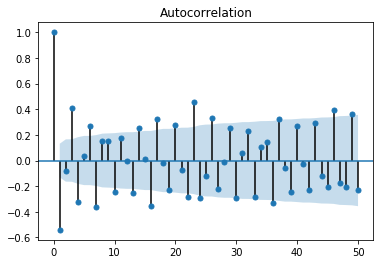

In [77]:
#envie de zommer sur quelques valeurs
plot_acf(R, lags = 50)
pyplot.show()

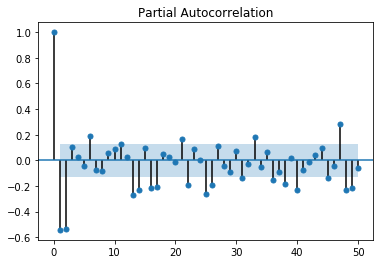

In [78]:
#trace les autocorelations partielles
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(R, lags=50)
pyplot.show()

## Modèle ARMA

In [116]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(data2.diff12_1,(3,0))
train = model.fit()
print(train.summary())

print(train.resid)

/home/fatima_moqran/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
residus = train.resid

In [ ]:
#imprimer le summary
#Tester les résidus si ils sont stationnaires
#si modèle bon on doit fitter 